In [1]:
# To use PySpark from Jupyter Notebook
import findspark
findspark.init()

## <span style='color: orange'>Import libraries(I provide all libs that I need when make this tasks, if you need some external import them here)</span>

In [2]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, IntegerType, StringType
from pyspark.sql.functions import col
from pyspark.sql.functions import max, avg, min
from pyspark.sql.window import Window
from pyspark.sql.functions import row_number
from pyspark.sql.functions import when

## <span style='color: orange'>Create local SparkSession</span>

In [3]:
%%time  
# To display in my code the time that a cell is running
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('Practise').getOrCreate()
spark

CPU times: total: 46.9 ms
Wall time: 11.8 s


## <span style='color: orange'>Read csv with inferschema</span>

In [4]:
%%time
data = spark.read.csv('ds_salaries.csv')
data

CPU times: total: 0 ns
Wall time: 5.55 s


DataFrame[_c0: string, _c1: string, _c2: string, _c3: string, _c4: string, _c5: string, _c6: string, _c7: string, _c8: string, _c9: string, _c10: string, _c11: string]

## <span style='color: orange'>Read csv one more time with the same code and you will see that it almostly don't take time, because info already in SparkSession and it will not read nothing from this file</span>

In [5]:
%%time
data = spark.read.csv('sample_dataset.csv')
data

CPU times: total: 0 ns
Wall time: 355 ms


DataFrame[_c0: string]

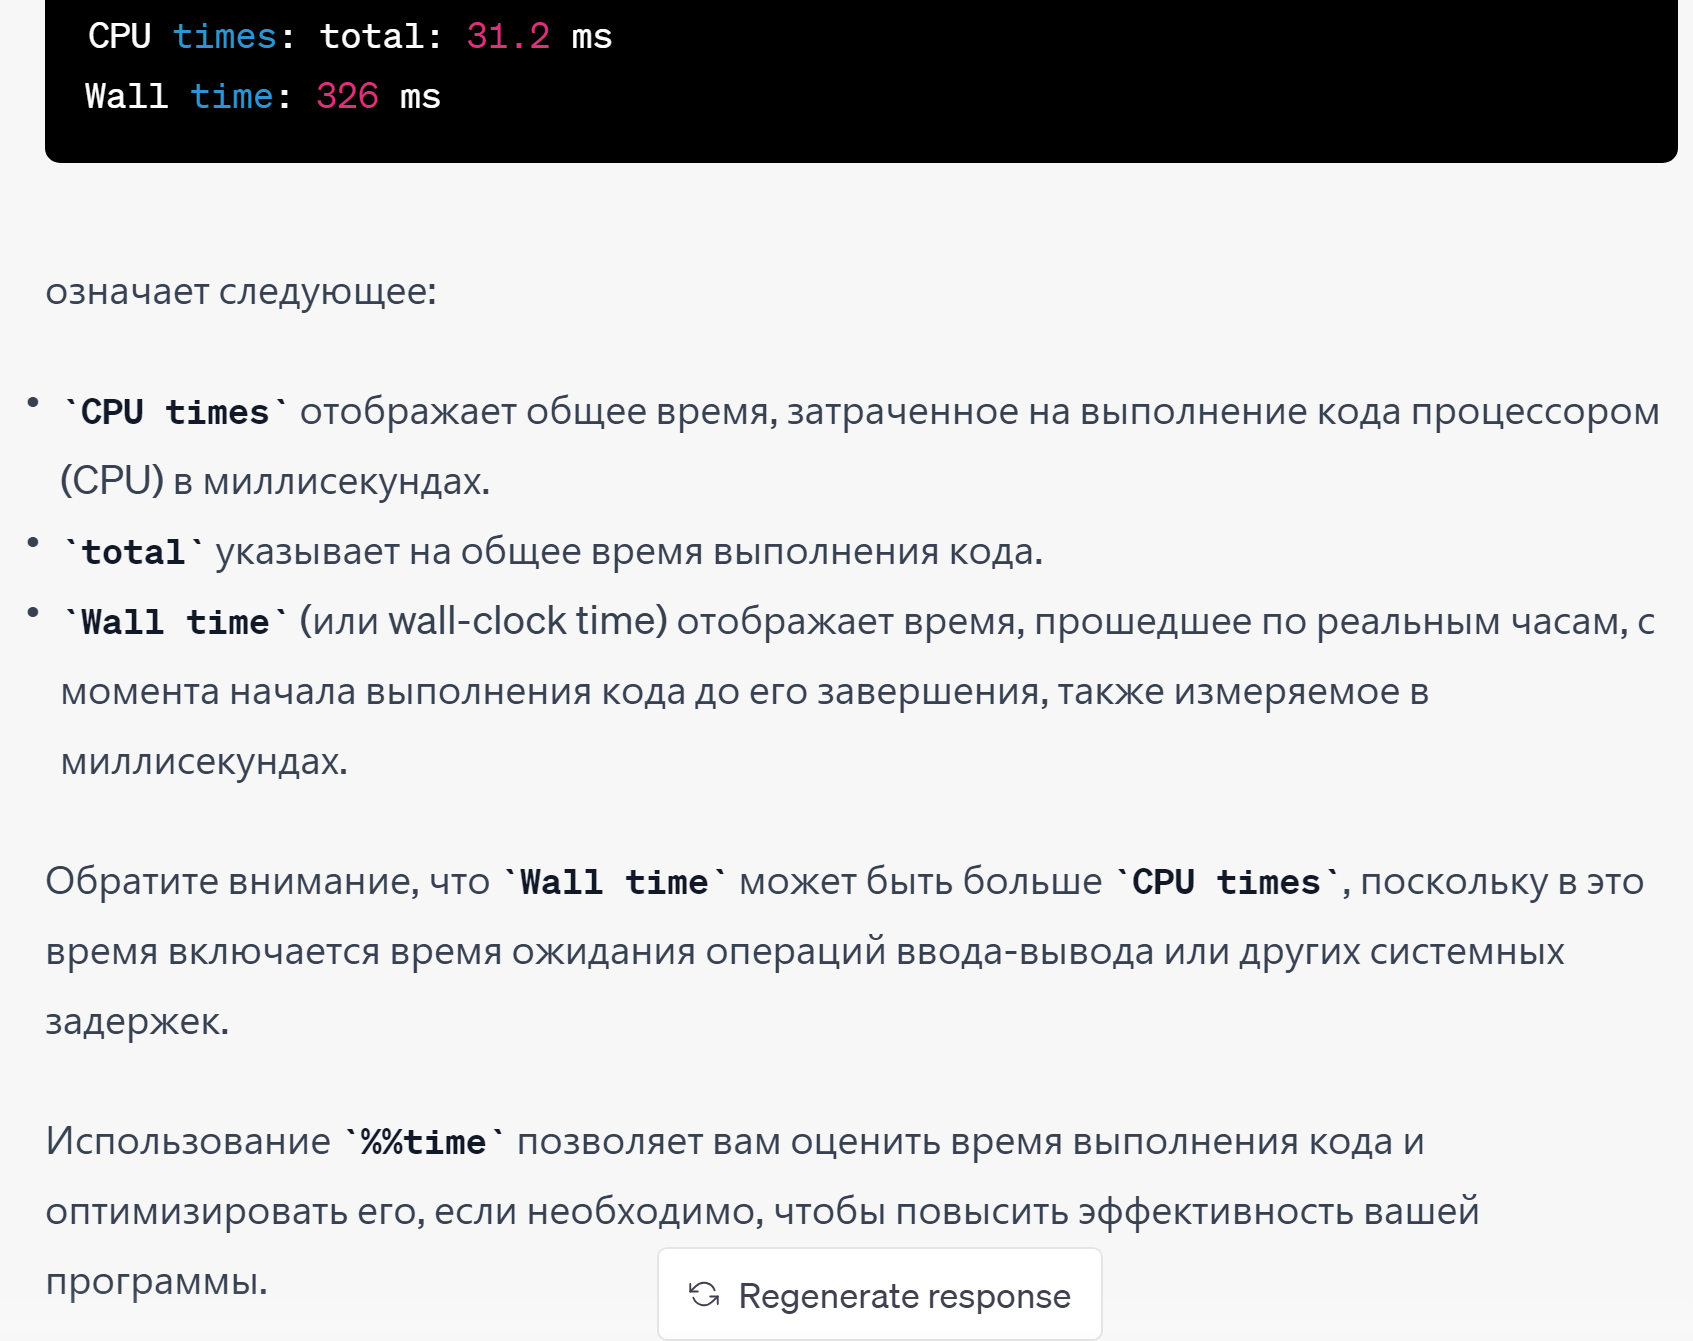

write schema of scv on screen

create schema of this scv

restart kernel without cleaning output and after restarting you need to initialize SparkSession, after initialize start execute only cells from cell with schema=
=StructType.... 
To restart kernel click Kernel, Restart.

read ds_salaries with predefined schema and compare results from this cell and cell with inferSchema

this happens because read operation is lazy(transformation), but if you use inferschema it start to be action that will create Spark Job, because Spark need to loop throw all file to check datatypes for all columns and this can harm to your code(if we compare to parquet, it will also go to check data types, but parquet provide meta information, so Spark will not go throw all file, he will just read meta information, but csv don't provide such meta information). Also header make Spark to create one more Spark Job to check first line
to define name of columns and remember to skeep it when reading. Actual reading start when you will use first action. More about Spark Jobs you will see in next topic

write schema of scv on screen one more time and compare with previous

now continue to work with one of the dataframes that you create

print data in dataframe using df.show

print data in dataframe using display(df.toPandas())

create df_job_title that consists from all job_titles without duplicates

print all rows from df_job_titles without truncating jobs

create  df_analytic that will consists from max, avg, min USD salaries for all job_titles using groupBy. name of fields is avg_salary, min_salary, max_salary

print all rows from df_analytic without trancating jobs

now you need to add in df_analytic column row_id, that will show order of all job_titles depending on avg salary. they should be descending

print all data from df_analytic

it isn't beautifull, so we need to put now row_id on first place in df_analytic

print df_analytic now

here you need to create df_exp_lvl with the biggest usd_salary(biggest_salary) for each experience_level(you need to save all fields like in entire dataframe)

print here df_exp_lvl

create df_best that consists from rows where salary of guy same as biggest salary for other people in his exp_lvl and choose only columns: id, experience_level, biggest_salary, employee_residence

print df_best

drop duplicates if exist by experience_level

print df_best

create df_new_best from df_best without id, and make the next: when exp_level = MI we want middle, when SE we want senior, else Null

print df_new_best

write df_new_best like 1.csv and load then it to df_final

print df_final

filter df_final to delete experience_level where it Null, then join this table by biggest_salary(salary_in_usd) and employee_residence with entire df

print df_final

last task is to save in variable and then print this variable of the biggest salary_in_usd from df_final

It is the end of PySpark basics. In other lessons you will learn optimizations technics and how to make distributed system